## **Data Fields**

1) Home Ownership - тип домовладения (дом, аренда, ипотека)

2) Annual Income - годовой доход

3) Years in current job - стаж на работе

4) Tax Liens - налоговый залог

5) Number of Open Accounts - количество открытых счётов

6) Years of Credit History - кредитный стаж (в годах)

7) Maximum Open Credit

8) Number of Credit Problems - количество проблем, возникших с кредитом.

9) Months since last delinquent - количество месяцев с последнего нарушения.

10) Bankruptcies	- банкротство

11) Purpose

12) Term - длительность  кредита

13) Current Loan Amount - текущая сумма кредитного залога

14) Current Credit Balance - текущий кредитный баланс

15) Monthly Debt - ежемесячный долг

15) Credit Score 

17) Credit Default - целевой признак


## Подключение библиотек и скриптов

In [1655]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
 
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
 
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
 
    return df

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Пути к директориям и файлам

In [1656]:
DATASET_TRAIN_PATH = './final project 2/course_project_train.csv'
DATASET_TEST_PATH = './final project 2/course_project_test.csv'
train_data = pd.read_csv(DATASET_TRAIN_PATH)
test_data = pd.read_csv(DATASET_TEST_PATH)

In [1657]:
train_data_orig = train_data.copy()

In [1658]:
train_data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [1659]:
test_data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [1660]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [1661]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## Корреляция признаков в необработанном датасете

In [1662]:
def corr_with_target(data):
    TARGET_NAME = 'Credit Default'
    BASE_FEATURE_NAMES = data.columns.drop(TARGET_NAME).tolist()
    
    corr_with_target = data[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
    plt.title('Correlation with target variable')
    plt.show()

def corr_matrix(data):
    plt.figure(figsize=(30,30))

    features_df = data.drop(['Credit Default'],axis=1).columns.tolist()

    sns.set(font_scale=1.4)
    sns.heatmap(data[features_df].corr().round(2),annot=True,linewidths=.5,cmap='GnBu')

    plt.title("Correlation matrix")
    plt.show()

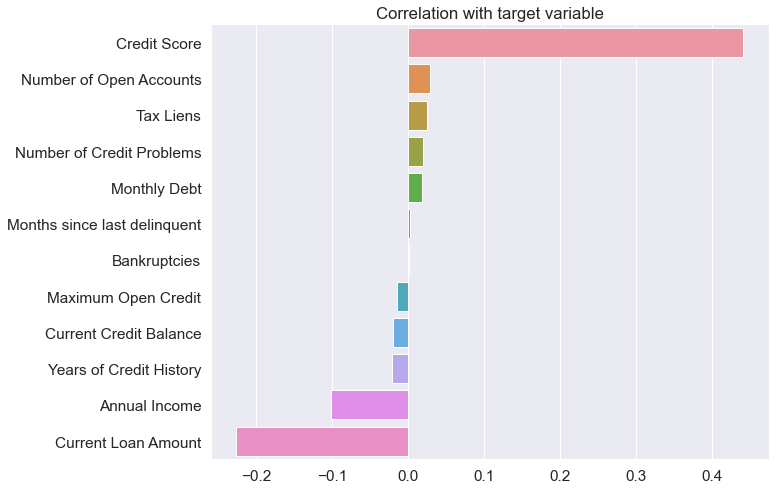

In [1663]:
corr_with_target(train_data)

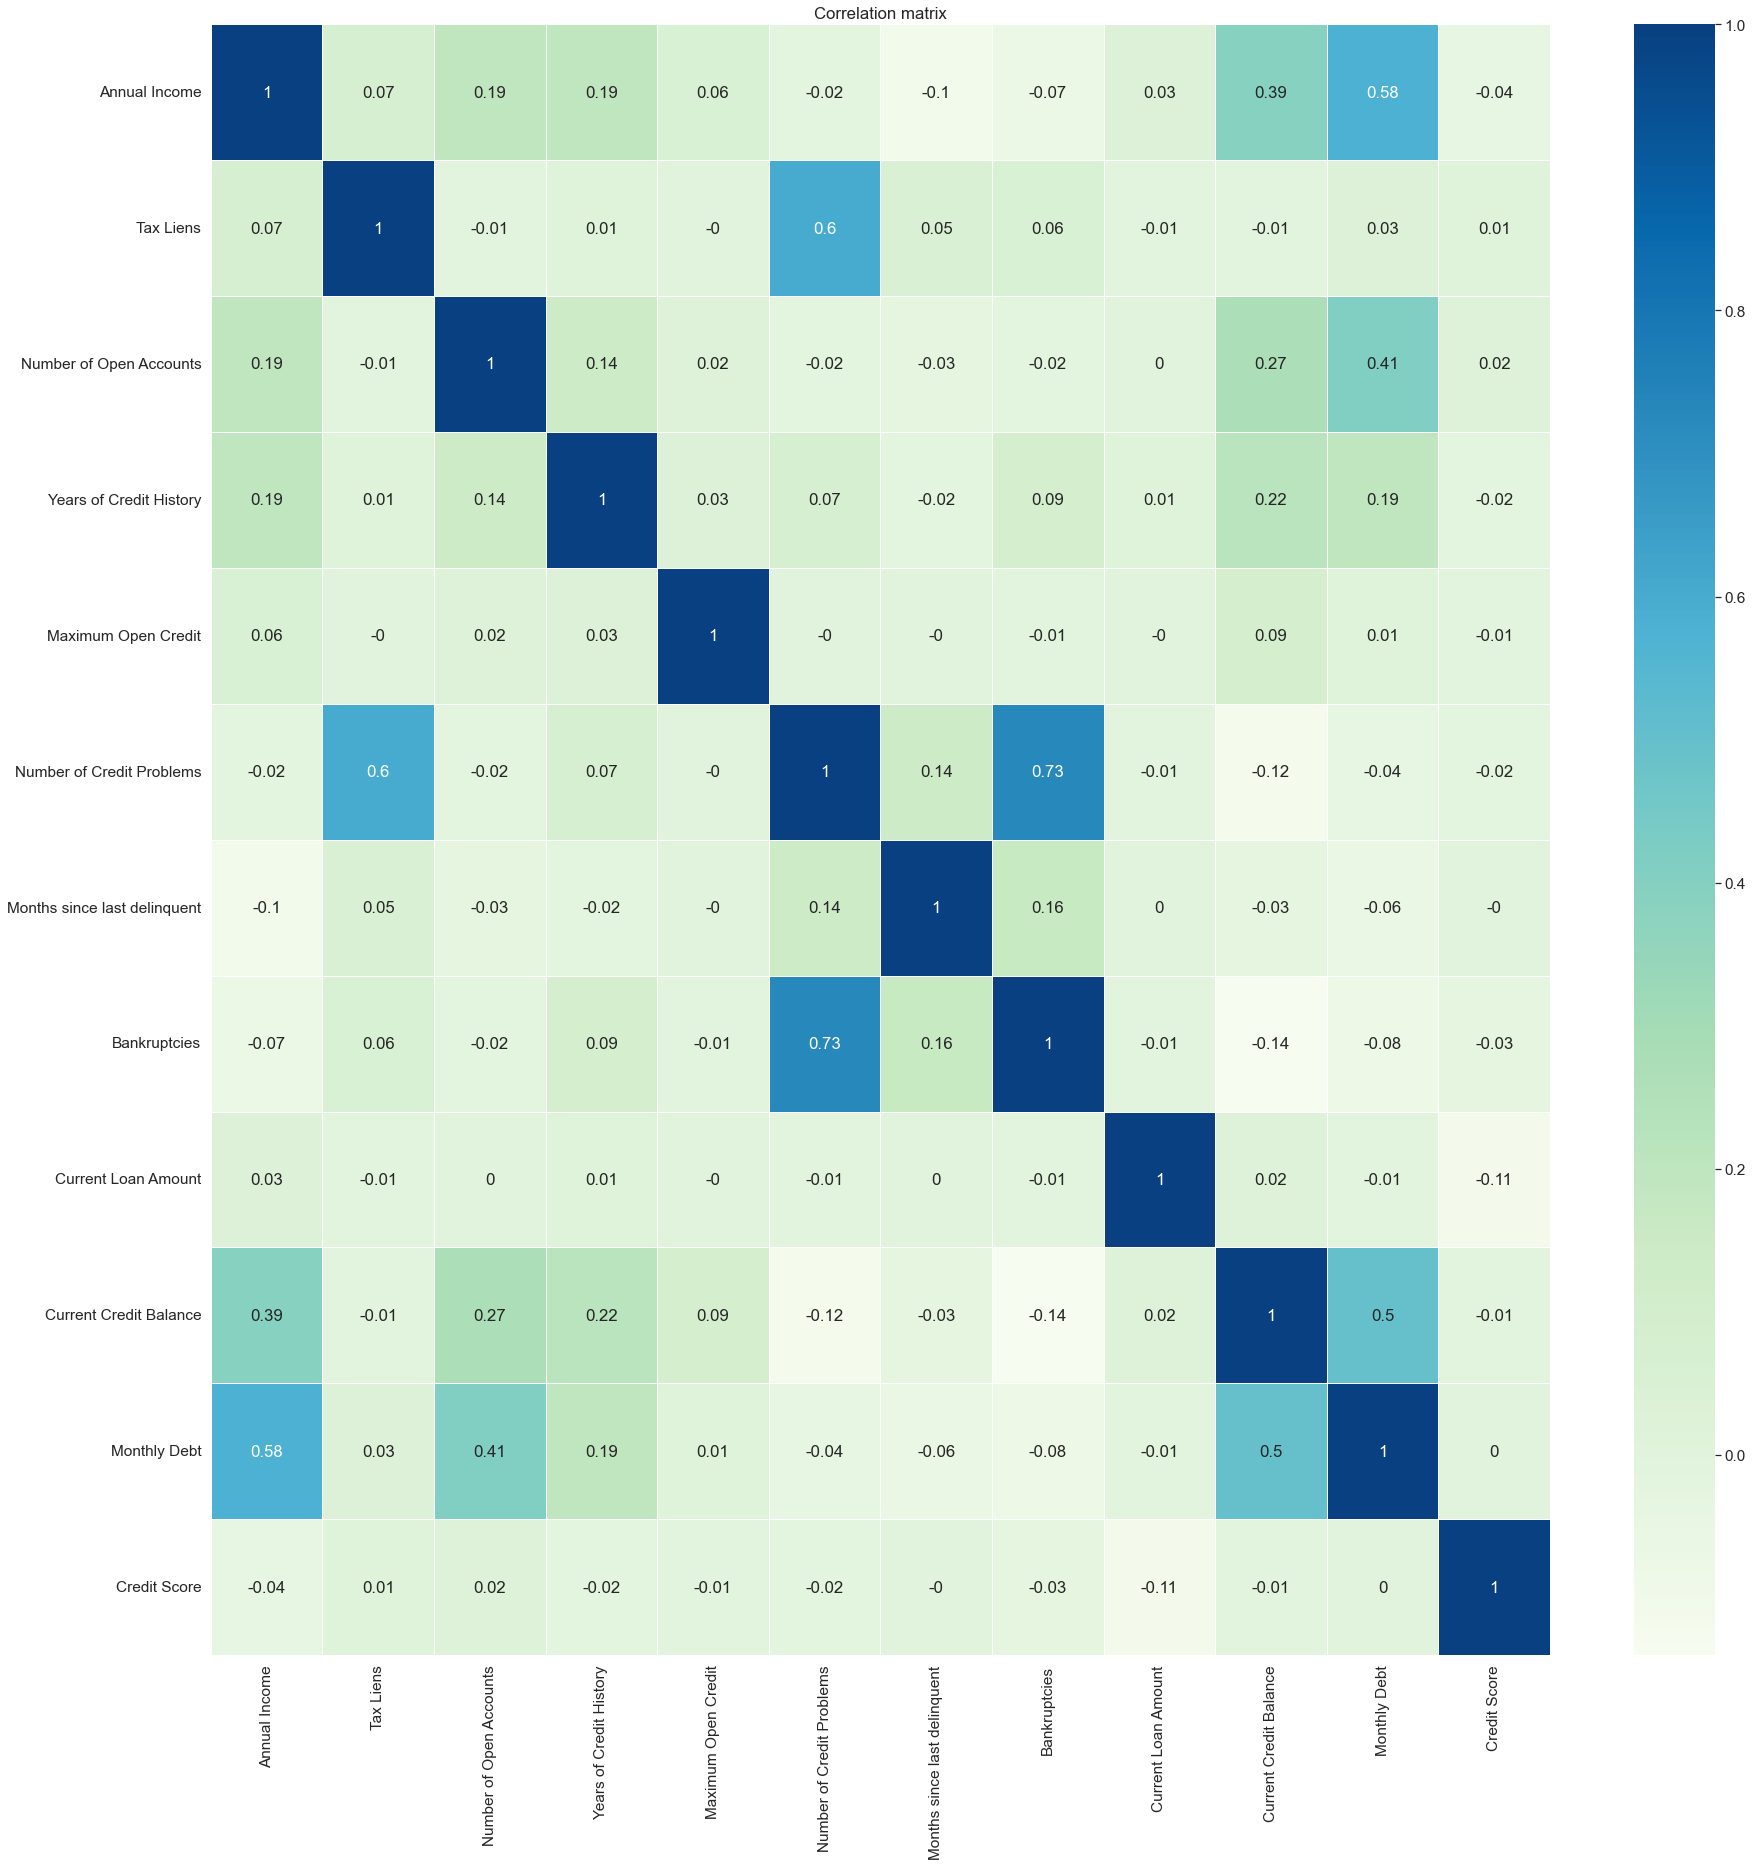

In [1664]:
corr_matrix(train_data)

## Работа с признаками

In [1665]:
train_data['Credit Default'].value_counts()
#ассиметричное распределение целевой переменной --> потребуется дальнейшая балансировка

0    5387
1    2113
Name: Credit Default, dtype: int64

***1)Home Ownership***

In [1666]:
train_data['Home Ownership'].dtype

dtype('O')

Категориальный признак с 4-мя категориями

In [1667]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [1668]:
train_data['Home Ownership'].values

array(['Own Home', 'Own Home', 'Home Mortgage', ..., 'Rent',
       'Home Mortgage', 'Rent'], dtype=object)

In [1669]:
test_data['Home Ownership'].values

array(['Rent', 'Rent', 'Home Mortgage', ..., 'Home Mortgage', 'Rent',
       'Rent'], dtype=object)

In [1670]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Home Ownership'])], axis=1)
#обработаем категориальный признак, используя One-Hot-Encoding
train_data.drop(['Home Ownership'],inplace=True,axis=1)

In [1671]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Home Ownership'])], axis=1)
test_data.drop(['Home Ownership'],inplace=True,axis=1)

In [1672]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 5943 non-null   float64
 1   Years in current job          7129 non-null   object 
 2   Tax Liens                     7500 non-null   float64
 3   Number of Open Accounts       7500 non-null   float64
 4   Years of Credit History       7500 non-null   float64
 5   Maximum Open Credit           7500 non-null   float64
 6   Number of Credit Problems     7500 non-null   float64
 7   Months since last delinquent  3419 non-null   float64
 8   Bankruptcies                  7486 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   object 
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

***2) Annual Income***

In [1673]:
train_data['Annual Income'].dtype

dtype('float64')

In [1674]:
train_data['Annual Income'].head()

0     482087.0
1    1025487.0
2     751412.0
3     805068.0
4     776264.0
Name: Annual Income, dtype: float64

In [1675]:
len(train_data['Annual Income'].unique())

5479

<AxesSubplot:title={'center':'Distribution of Annual Income'}, xlabel='Annual Income', ylabel='Amount of clients'>

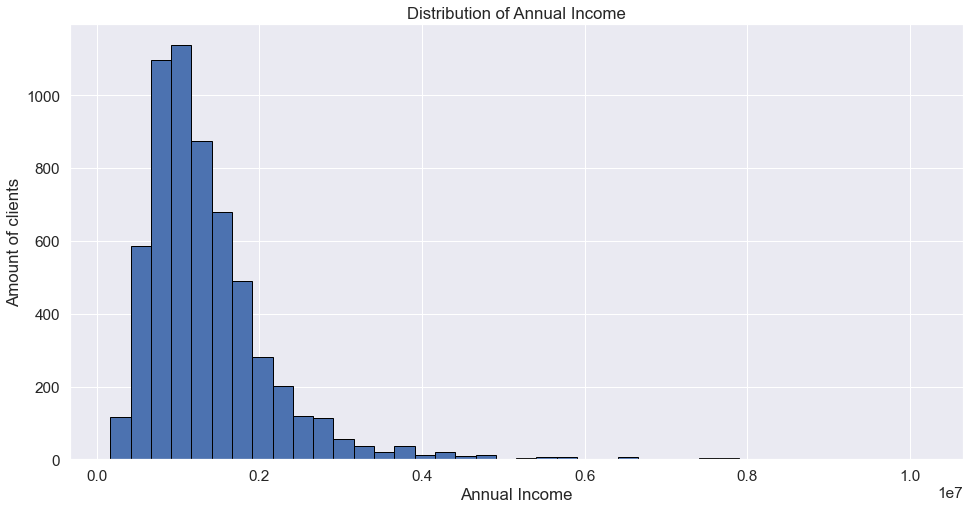

In [1676]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income')
train_data['Annual Income'].hist(bins=40,edgecolor='black')

Основной массив данных наблюдается в диапазоне до ~0.3 x 1e7, однако график сдвинут влево, следовательно - справа присутствует большое количество выбросов, которые требуется обработать (также как и нулевые значения).

In [1677]:
len(train_data.loc[train_data['Annual Income'].isnull() == True]) #количество нулевых значений

1557

In [1678]:
train_data.loc[train_data['Annual Income'].isnull() == True,'Annual Income'] = train_data['Annual Income'].median()
# заполняем пропуски медианой, количество пропусков велико --> упадет вариабельность признака

<AxesSubplot:title={'center':'Distribution of Annual Income'}, xlabel='Annual Income', ylabel='Amount of clients'>

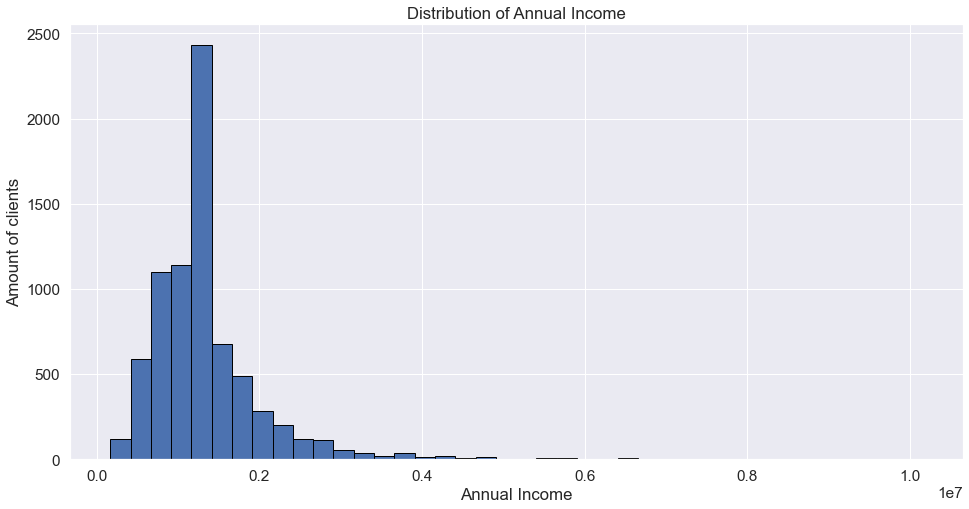

In [1679]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income')
train_data['Annual Income'].hist(bins=40,edgecolor='black')

<AxesSubplot:xlabel='Annual Income'>

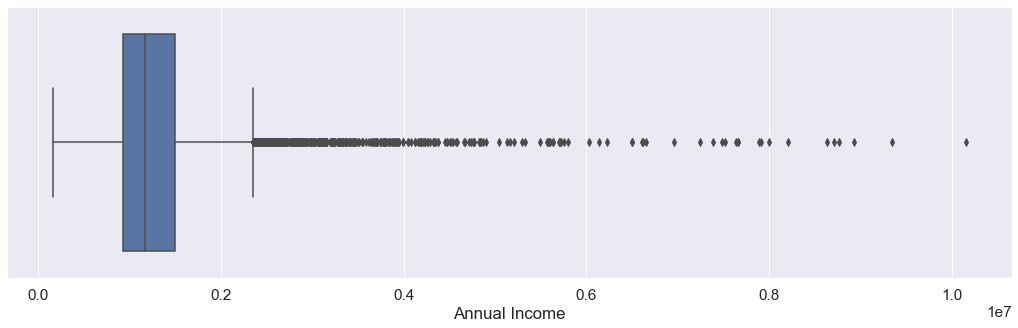

In [1680]:
plt.figure(figsize=(18,5))
plt.subplot(111)
plt.xlabel('Annual Income')
sns.boxplot(train_data['Annual Income'], whis=1.5)

In [1681]:
#train_data.loc[(train_data['Annual Income'] < train_data['Annual Income'].quantile(0.025))|(train_data['Annual Income'] > np.quantile(train_data['Annual Income'],q=0.9)), 'Annual Income'] = train_data['Annual Income'].median()
# выбросы также логичнее будет заменить на медиану

<AxesSubplot:title={'center':'Distribution of Annual Income'}, xlabel='Annual Income', ylabel='Amount of clients'>

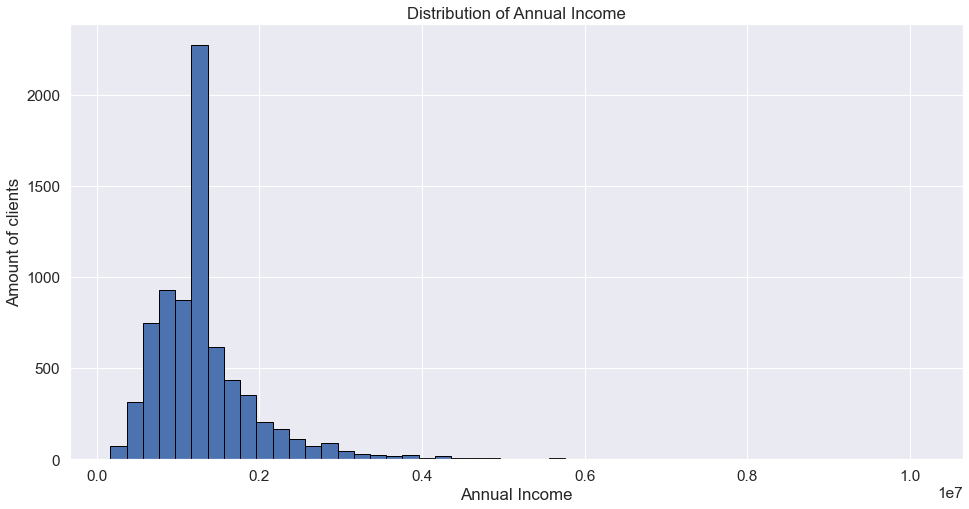

In [1682]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income')
train_data['Annual Income'].hist(bins=50,edgecolor='black')

<AxesSubplot:xlabel='Annual Income'>

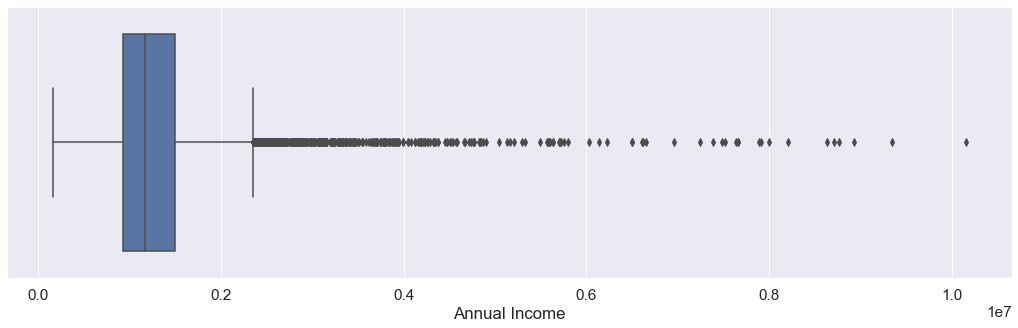

In [1683]:
plt.figure(figsize=(18,5))
plt.subplot(111)
plt.xlabel('Annual Income')
sns.boxplot(train_data['Annual Income'], whis=1.5)

<AxesSubplot:title={'center':'Distribution of Annual Income (Test Dataset)'}, xlabel='Annual Income', ylabel='Amount of clients'>

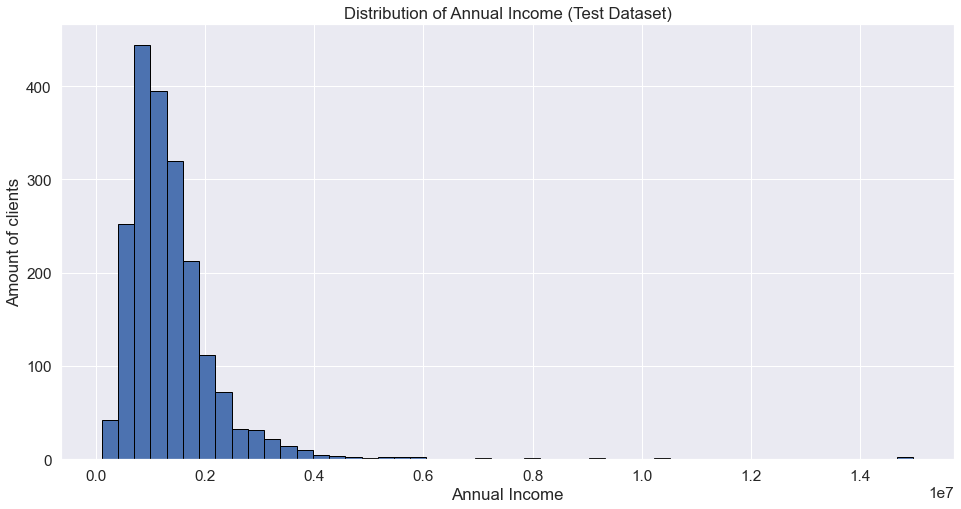

In [1684]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income (Test Dataset)')
test_data['Annual Income'].hist(bins=50,edgecolor='black')

In [1685]:
len(test_data.loc[test_data['Annual Income'].isnull() == True]) #количество нулевых значений в тестовом датасете

513

In [1686]:
test_data.loc[test_data['Annual Income'].isnull() == True,'Annual Income'] = test_data['Annual Income'].median()

In [1687]:
test_data.loc[(test_data['Annual Income'] < test_data['Annual Income'].quantile(0.05))|(test_data['Annual Income'] > np.quantile(test_data['Annual Income'],q=0.85)), 'Annual Income'] = test_data['Annual Income'].median()

<AxesSubplot:xlabel='Annual Income'>

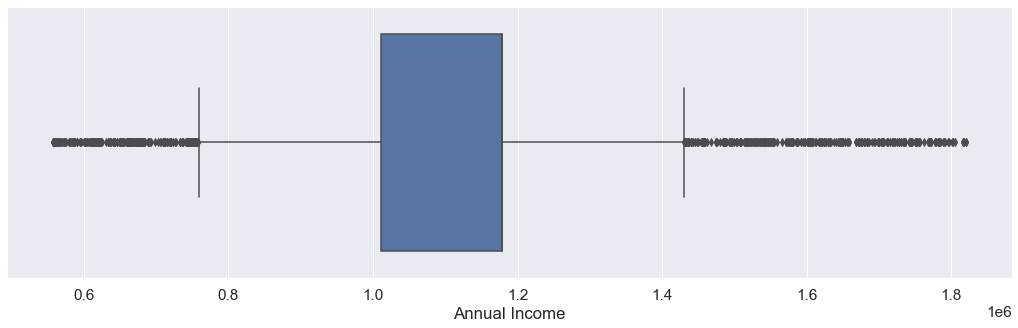

In [1688]:
plt.figure(figsize=(18,5))
plt.subplot(111)
plt.xlabel('Annual Income (Test Dataseth)')
sns.boxplot(test_data['Annual Income'], whis=1.5)

У признака малая вариабельность, распределение с большим пиком в области медианы (в частности из-за замены пропусков) --> большое количество выбросов, не поддающихся обработке

***3) Years in Current Job***

In [1689]:
train_data['Years in current job'].dtype
#категориальный признак с 11 категориями

dtype('O')

In [1690]:
train_data['Years in current job'].describe()

count          7129
unique           11
top       10+ years
freq           2332
Name: Years in current job, dtype: object

In [1691]:
test_data['Years in current job'].describe()

count          2414
unique           11
top       10+ years
freq            810
Name: Years in current job, dtype: object

In [1692]:
train_data['Years in current job'] = train_data['Years in current job'].fillna(train_data['Years in current job'].mode()[0])
test_data['Years in current job'] = test_data['Years in current job'].fillna(test_data['Years in current job'].mode()[0])
#заполняем пропуски модой

In [1693]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Years in current job'])], axis=1)
train_data.drop(['Years in current job'],inplace=True,axis=1)

In [1694]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Years in current job'])], axis=1)
test_data.drop(['Years in current job'],inplace=True,axis=1)

***4) Tax Liens***

In [1695]:
train_data['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

In [1696]:
test_data['Tax Liens'].describe()

count    2500.000000
mean        0.035200
std         0.386291
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: Tax Liens, dtype: float64

In [1697]:
train_data['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [1698]:
test_data['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
5.0        1
4.0        1
6.0        1
3.0        1
15.0       1
Name: Tax Liens, dtype: int64

***5) Number of Open Accounts***

In [1699]:
train_data['Number of Open Accounts'].dtype

dtype('float64')

In [1700]:
train_data['Number of Open Accounts'].describe()

count    7500.000000
mean       11.130933
std         4.908924
min         2.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        43.000000
Name: Number of Open Accounts, dtype: float64

In [1701]:
test_data['Number of Open Accounts'].describe()

count    2500.000000
mean       11.184400
std         4.852774
min         1.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        48.000000
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:title={'center':'Distribution of Number of open accounts'}, xlabel='Number of open accounts', ylabel='Amount of clients'>

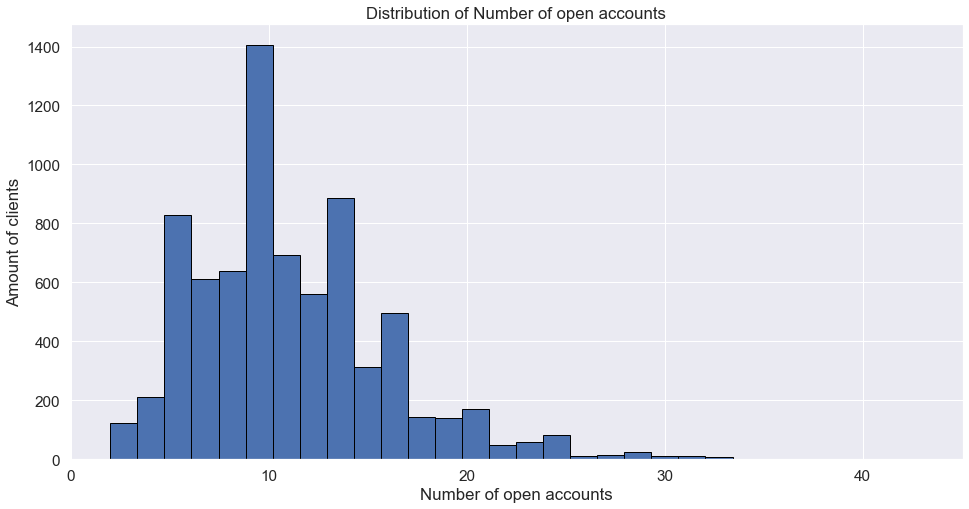

In [1702]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Number of open accounts')
plt.title('Distribution of Number of open accounts')
train_data['Number of Open Accounts'].hist(bins=30,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Number of Open Accounts'>

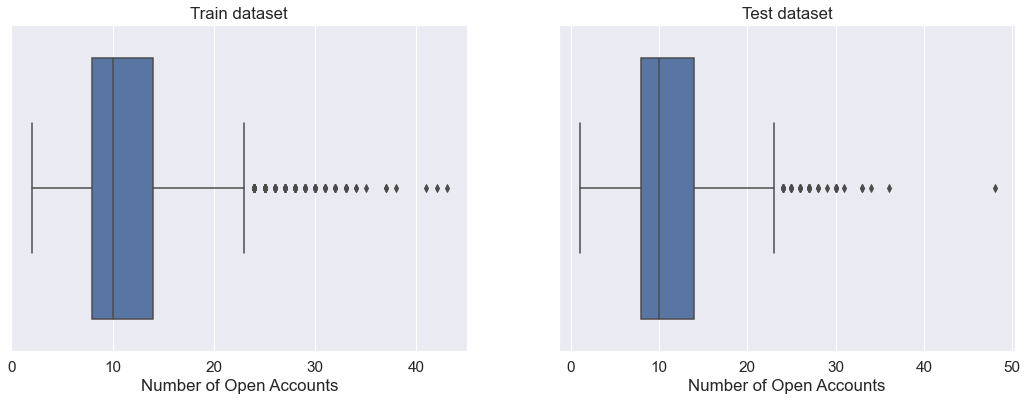

In [1703]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Number of Open Accounts'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Number of Open Accounts'], whis=1.5)

In [1704]:
train_data.loc[(train_data['Number of Open Accounts'] < train_data['Number of Open Accounts'].quantile(0.025))|(train_data['Number of Open Accounts'] > np.quantile(train_data['Number of Open Accounts'],q=0.95)), 'Number of Open Accounts'] = train_data['Number of Open Accounts'].median()

In [1705]:
train_data.loc[(train_data['Number of Open Accounts'] < train_data['Number of Open Accounts'].quantile(0.025))|(train_data['Number of Open Accounts'] > np.quantile(train_data['Number of Open Accounts'],q=0.95)), 'Number of Open Accounts'] = train_data['Number of Open Accounts'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Number of Open Accounts'>

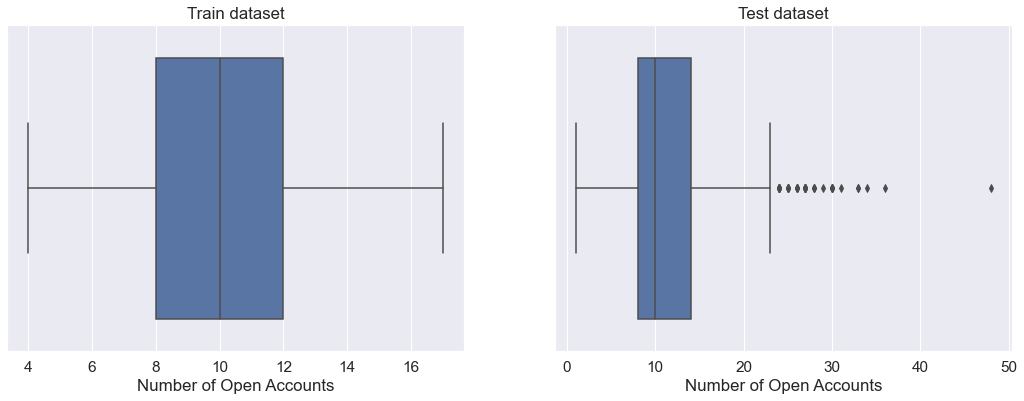

In [1706]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Number of Open Accounts'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Number of Open Accounts'], whis=1.5)

***6) Years of Credit History***

In [1707]:
train_data['Years of Credit History'].dtype

dtype('float64')

In [1708]:
train_data['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64

In [1709]:
test_data['Years of Credit History'].describe()

count    2500.000000
mean       18.325920
std         7.254659
min         3.900000
25%        13.400000
50%        17.000000
75%        22.100000
max        53.400000
Name: Years of Credit History, dtype: float64

<AxesSubplot:title={'center':'Distribution of Years of Credit History'}, xlabel='Years of Credit History', ylabel='Amount of clients'>

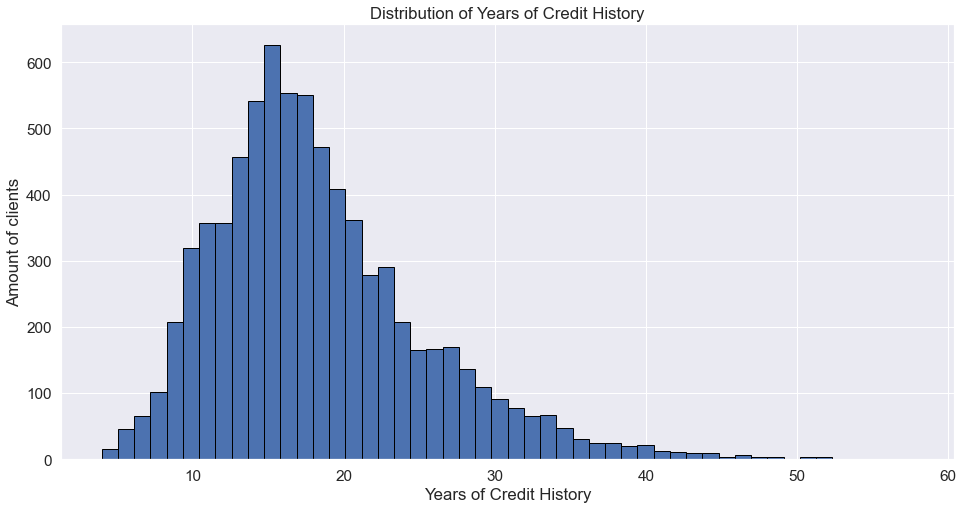

In [1710]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Years of Credit History')
plt.title('Distribution of Years of Credit History')
train_data['Years of Credit History'].hist(bins=50,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Years of Credit History'>

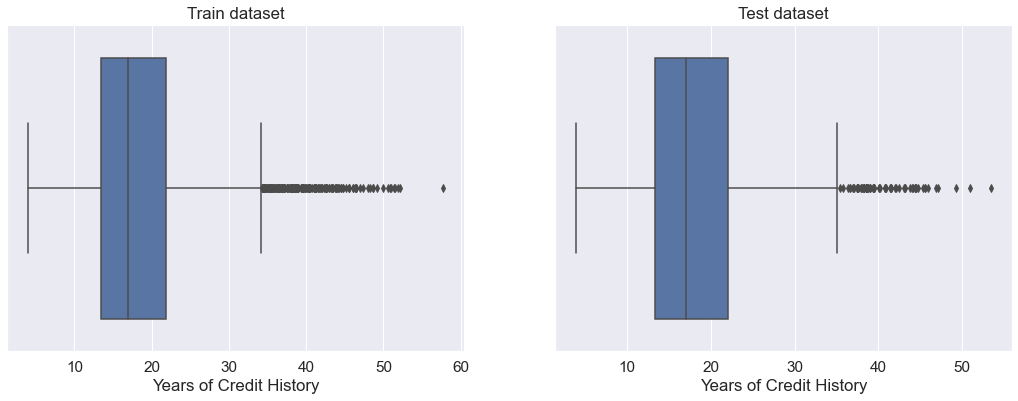

In [1711]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Years of Credit History'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Years of Credit History'], whis=1.5)

In [1712]:
train_data.loc[(train_data['Years of Credit History'] < train_data['Years of Credit History'].quantile(0.025))|(train_data['Years of Credit History'] > np.quantile(train_data['Years of Credit History'],q=0.9)), 'Years of Credit History'] = train_data['Years of Credit History'].median()

In [1713]:
test_data.loc[(test_data['Years of Credit History'] < test_data['Years of Credit History'].quantile(0.025))|(test_data['Years of Credit History'] > np.quantile(test_data['Years of Credit History'],q=0.9)), 'Years of Credit History'] = test_data['Years of Credit History'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Years of Credit History'>

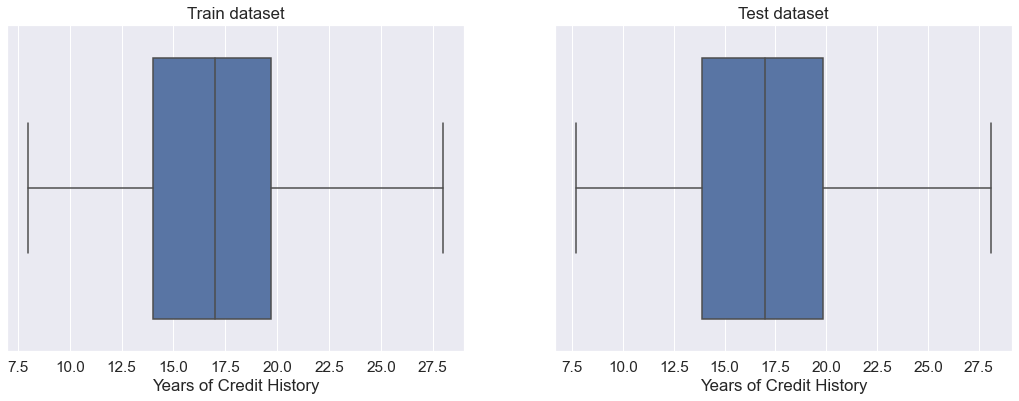

In [1714]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Years of Credit History'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Years of Credit History'], whis=1.5)

***7) Maximum Open Credit***

In [1715]:
train_data['Maximum Open Credit'].dtype

dtype('float64')

In [1716]:
train_data['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

In [1717]:
test_data['Maximum Open Credit'].describe()

count    2.500000e+03
mean     7.105704e+05
std      1.511983e+06
min      0.000000e+00
25%      2.785860e+05
50%      4.786760e+05
75%      8.025985e+05
max      5.448439e+07
Name: Maximum Open Credit, dtype: float64

<AxesSubplot:title={'center':'Distribution of Maximum Open Credit'}, xlabel='Maximum Open Credit', ylabel='Amount of clients'>

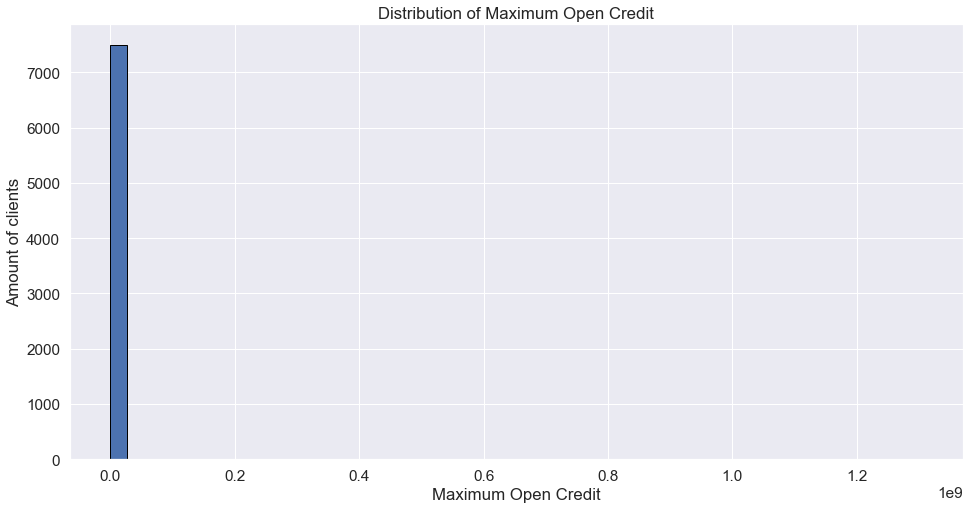

In [1718]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Maximum Open Credit')
plt.title('Distribution of Maximum Open Credit')
train_data['Maximum Open Credit'].hist(bins=50,edgecolor='black')

Вид графика свидетельствует о наличии неадекватных значений в правом диапазоне.

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Maximum Open Credit'>

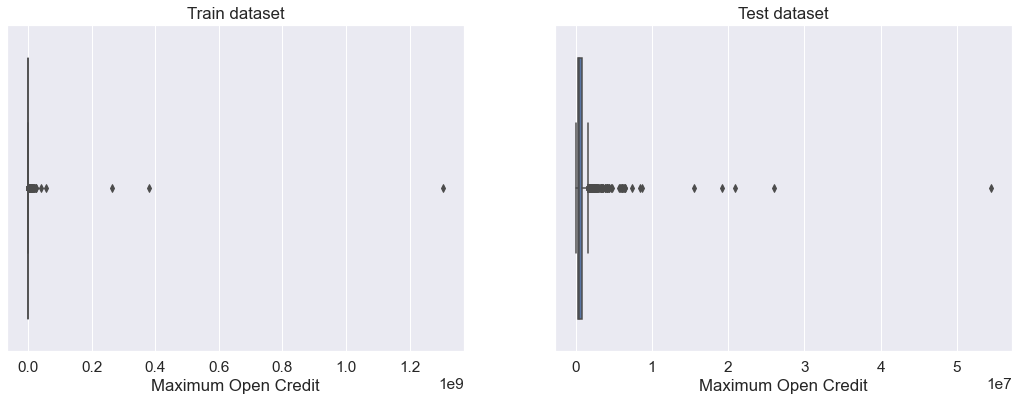

In [1719]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Maximum Open Credit'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Maximum Open Credit'], whis=1.5)

In [1720]:
train_data.loc[(train_data['Maximum Open Credit'] < train_data['Maximum Open Credit'].quantile(0.025))|(train_data['Maximum Open Credit'] > np.quantile(train_data['Maximum Open Credit'],q=0.7)), 'Maximum Open Credit'] = train_data['Maximum Open Credit'].median()

In [1721]:
test_data.loc[(test_data['Maximum Open Credit'] < test_data['Maximum Open Credit'].quantile(0.025))|(test_data['Maximum Open Credit'] > np.quantile(test_data['Maximum Open Credit'],q=0.7)), 'Maximum Open Credit'] = test_data['Maximum Open Credit'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Maximum Open Credit'>

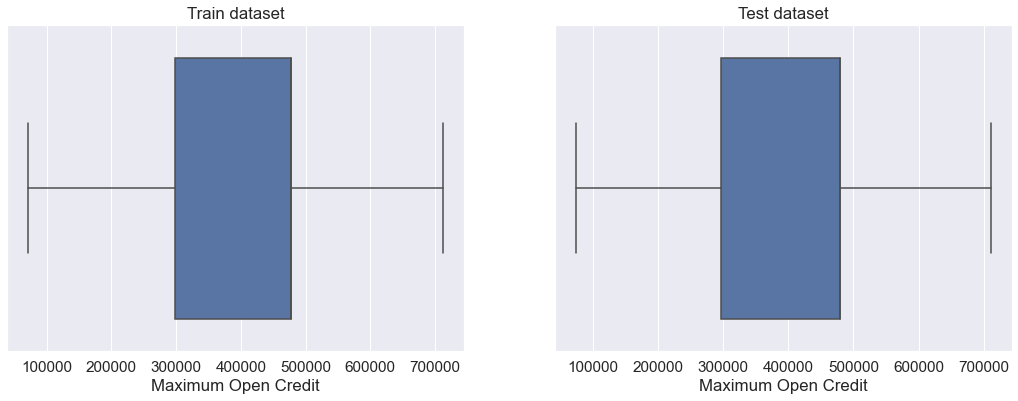

In [1722]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Maximum Open Credit'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Maximum Open Credit'], whis=1.5)

<AxesSubplot:title={'center':'Distribution of Maximum Open Credit'}, xlabel='Maximum Open Credit', ylabel='Amount of clients'>

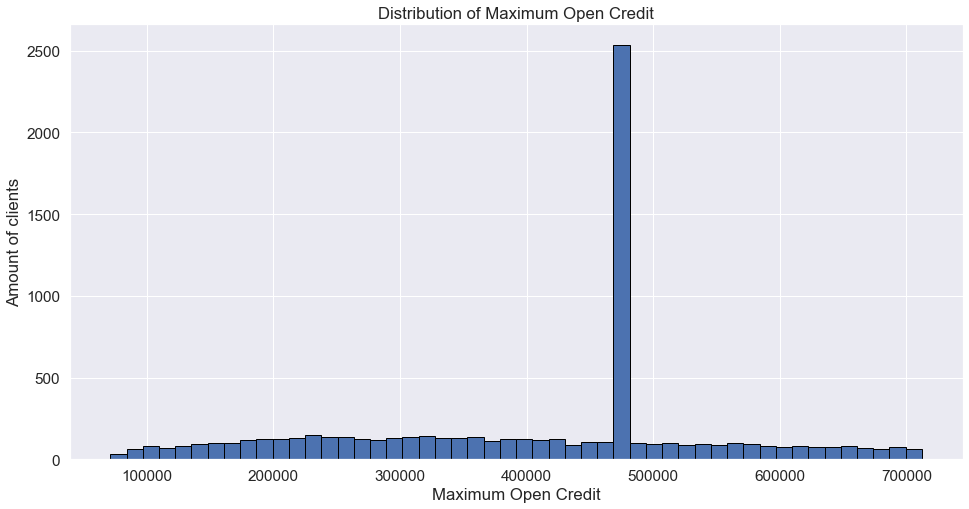

In [1723]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Maximum Open Credit')
plt.title('Distribution of Maximum Open Credit')
train_data['Maximum Open Credit'].hist(bins=50,edgecolor='black')

***8) Number of Credit Problems***

In [1724]:
train_data['Number of Credit Problems'].dtype

dtype('float64')

In [1725]:
train_data['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [1726]:
test_data['Number of Credit Problems'].value_counts()

0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
7.0        1
4.0        1
15.0       1
Name: Number of Credit Problems, dtype: int64

 Распределение значений внутри признака приближено к 9/10 --> практически вся выборка представлена значением 0 --> от  признака можно попытаться избавиться

In [1727]:
train_data.drop(['Number of Credit Problems'], inplace=True, axis=1)
test_data.drop(['Number of Credit Problems'], inplace=True, axis=1)

***9) Months since last delinquent***

In [1728]:
train_data['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

In [1729]:
test_data['Months since last delinquent'].describe()

count    1142.000000
mean       34.181261
std        22.024277
min         0.000000
25%        16.000000
50%        30.000000
75%        50.000000
max        82.000000
Name: Months since last delinquent, dtype: float64

Значения по данному признаку отсутствуют более чем у половины выборки, можно расценить это как отсутствие нарушений у данных клиентов --> можно приравнять их к нулю

In [1730]:
train_data['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(0)

In [1731]:
test_data['Months since last delinquent'] = test_data['Months since last delinquent'].fillna(0)

In [1732]:
train_data['Months since last delinquent'].describe()

count    7500.000000
mean       15.815200
std        22.649441
min         0.000000
25%         0.000000
50%         0.000000
75%        29.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

<AxesSubplot:title={'center':'Months since last delinquent'}, xlabel='Months since last delinquent', ylabel='Amount of clients'>

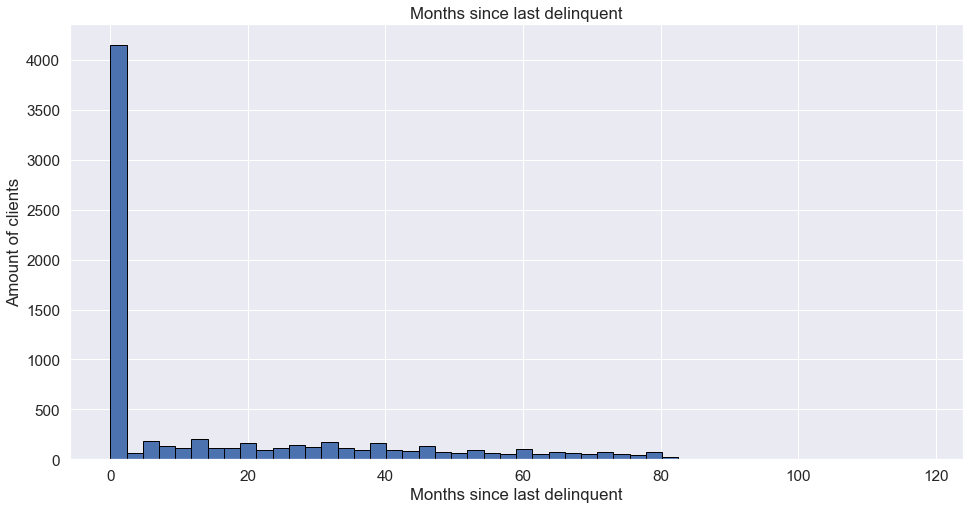

In [1733]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Months since last delinquent')
plt.title('Months since last delinquent')
train_data['Months since last delinquent'].hist(bins=50,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Months since last delinquent'>

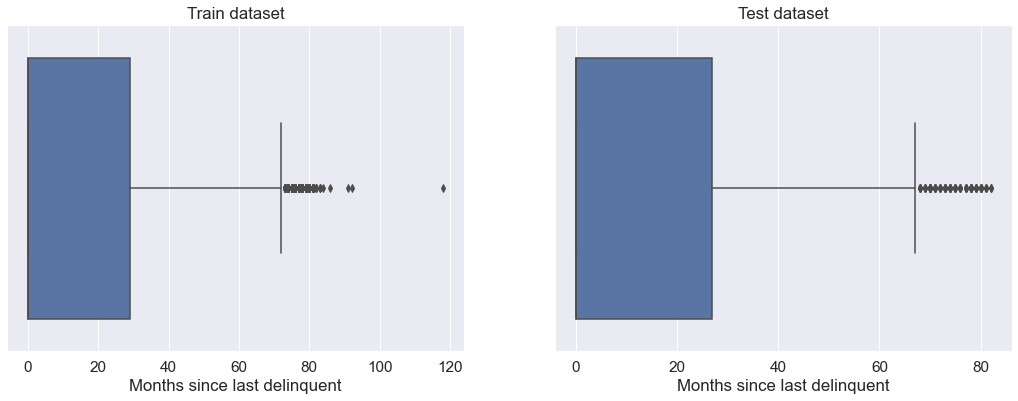

In [1734]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Months since last delinquent'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Months since last delinquent'], whis=1.5)

In [1735]:
train_data.loc[(train_data['Months since last delinquent'] < train_data['Months since last delinquent'].quantile(0.025))|(train_data['Months since last delinquent'] > np.quantile(train_data['Months since last delinquent'],q=0.75)), 'Months since last delinquent'] = train_data['Months since last delinquent'].median()

In [1736]:
test_data.loc[(test_data['Months since last delinquent'] < test_data['Months since last delinquent'].quantile(0.025))|(test_data['Months since last delinquent'] > np.quantile(test_data['Months since last delinquent'],q=0.75)), 'Months since last delinquent'] = test_data['Months since last delinquent'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Months since last delinquent'>

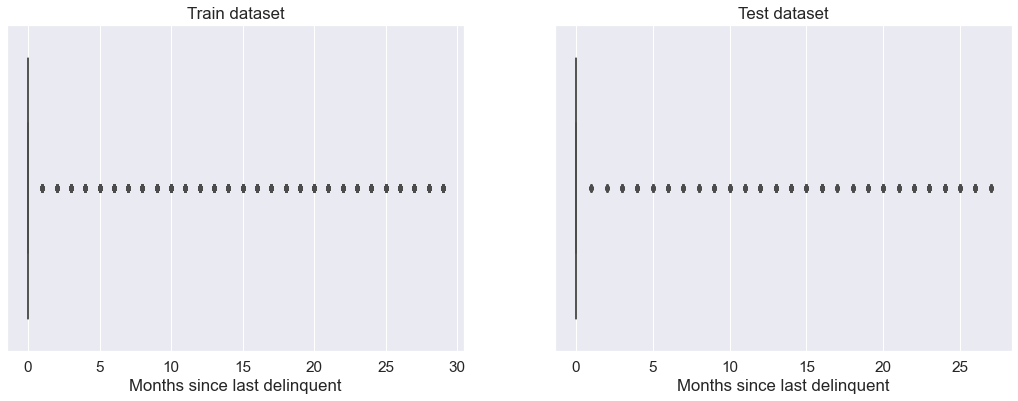

In [1737]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Months since last delinquent'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Months since last delinquent'], whis=1.5)

***10) Bankruptcies***

In [1738]:
train_data['Bankruptcies'].describe()

count    7486.000000
mean        0.117152
std         0.347192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Bankruptcies, dtype: float64

test_data['Bankruptcies'].describe()

In [1739]:
train_data['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [1740]:
test_data['Bankruptcies'].value_counts()

0.0    2252
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

    Ситуация, аналогичная 7-му признаку: соотношение значений 9/10 --> при обработке выбросов и пропусков признак по сути         будет представлен одним единственным значением.

In [1741]:
train_data.drop(['Bankruptcies'], inplace=True, axis=1)
test_data.drop(['Bankruptcies'],inplace=True, axis=1)

***11) Purpose***

In [1742]:
train_data['Purpose'].describe()

count                   7500
unique                    15
top       debt consolidation
freq                    5944
Name: Purpose, dtype: object

In [1743]:
train_data['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Выборка представлена в основном признаком debt consolidation (80%)

In [1744]:
train_data.drop(['Purpose'],inplace=True,axis=1)
test_data.drop(['Purpose'],inplace=True,axis=1)

***12) Term***

In [1745]:
train_data['Term'].describe()

count           7500
unique             2
top       Short Term
freq            5556
Name: Term, dtype: object

In [1746]:
test_data['Term'].describe()

count           2500
unique             2
top       Short Term
freq            1861
Name: Term, dtype: object

In [1747]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Term'])],axis=1)
train_data.drop(['Term'],inplace=True,axis=1)

In [1748]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Term'])],axis=1)
test_data.drop(['Term'],inplace=True,axis=1)

***13) Current Loan Amount***

In [1749]:
train_data['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [1750]:
train_data['Current Loan Amount'].value_counts(sort=True)

99999999.0    870
218064.0        6
89298.0         6
222926.0        5
265826.0        5
             ... 
351626.0        1
212498.0        1
187682.0        1
108922.0        1
26928.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [1751]:
test_data['Current Loan Amount'].describe()

count    2.500000e+03
mean     1.215572e+07
std      3.226097e+07
min      1.542200e+04
25%      1.871265e+05
50%      3.223660e+05
75%      5.225825e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

<AxesSubplot:title={'center':'Distribution of Current Loan Amount'}, xlabel='Current Loan Amount', ylabel='Amount of clients'>

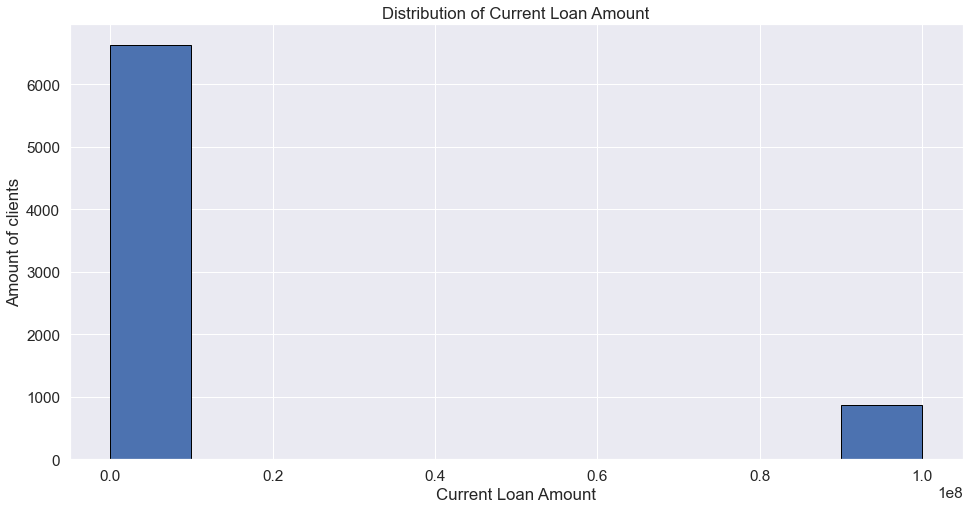

In [1752]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Current Loan Amount')
plt.title('Distribution of Current Loan Amount')
train_data['Current Loan Amount'].hist(bins=10,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Current Loan Amount'>

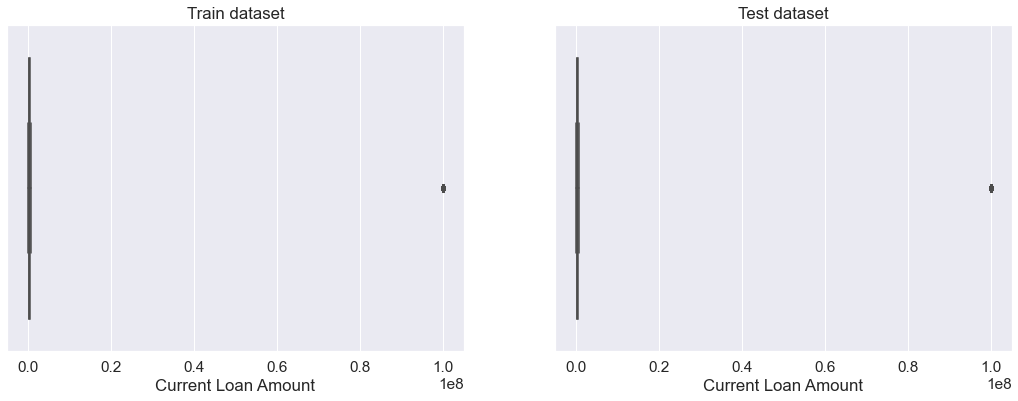

In [1753]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Current Loan Amount'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Current Loan Amount'], whis=1.5)

In [1754]:
#train_data.loc[(train_data['Current Loan Amount'] < train_data['Current Loan Amount'].quantile(0.025))|(train_data['Current Loan Amount'] > np.quantile(train_data['Current Loan Amount'],q=0.95)), 'Current Loan Amount'] = train_data['Current Loan Amount'].median()

In [1755]:
#test_data.loc[(test_data['Current Loan Amount'] < test_data['Current Loan Amount'].quantile(0.025))|(test_data['Current Loan Amount'] > np.quantile(test_data['Current Loan Amount'],q=0.95)), 'Current Loan Amount'] = test_data['Current Loan Amount'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Current Loan Amount'>

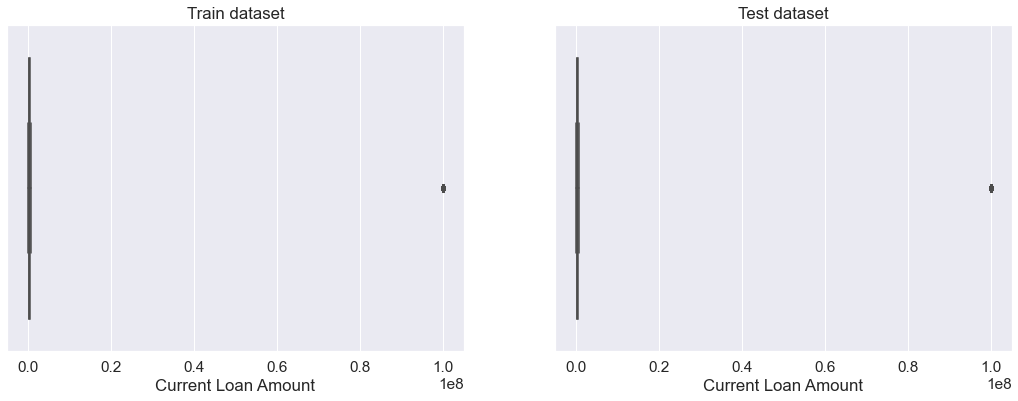

In [1756]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Current Loan Amount'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Current Loan Amount'], whis=1.5)

***14) Current Credit Balance***

In [1757]:
train_data['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

In [1758]:
test_data['Current Credit Balance'].describe()

count    2.500000e+03
mean     2.963966e+05
std      3.783020e+05
min      0.000000e+00
25%      1.101145e+05
50%      2.073850e+05
75%      3.663485e+05
max      6.030087e+06
Name: Current Credit Balance, dtype: float64

<AxesSubplot:title={'center':'Distribution of Current Credit Balance'}, xlabel='Current Loan Amount', ylabel='Amount of clients'>

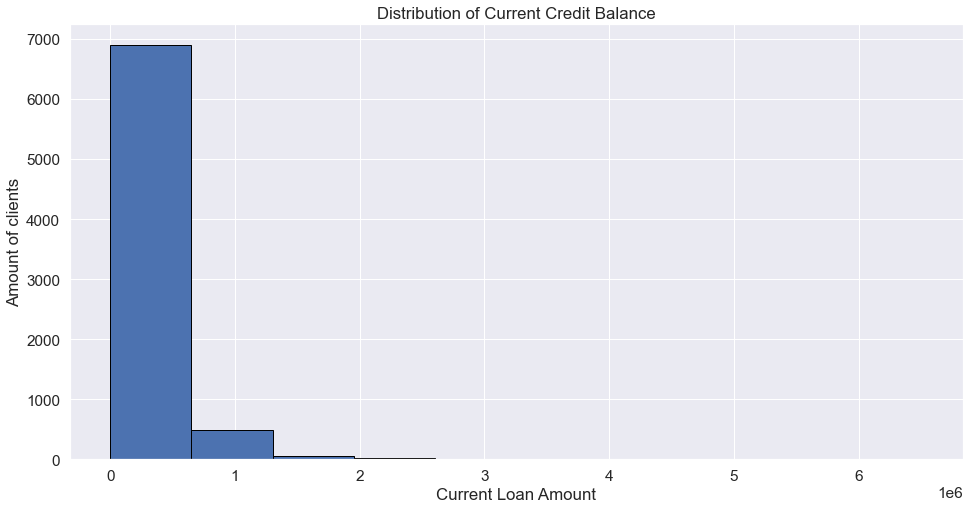

In [1759]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Current Loan Amount')
plt.title('Distribution of Current Credit Balance')
train_data['Current Credit Balance'].hist(bins=10,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Current Credit Balance'>

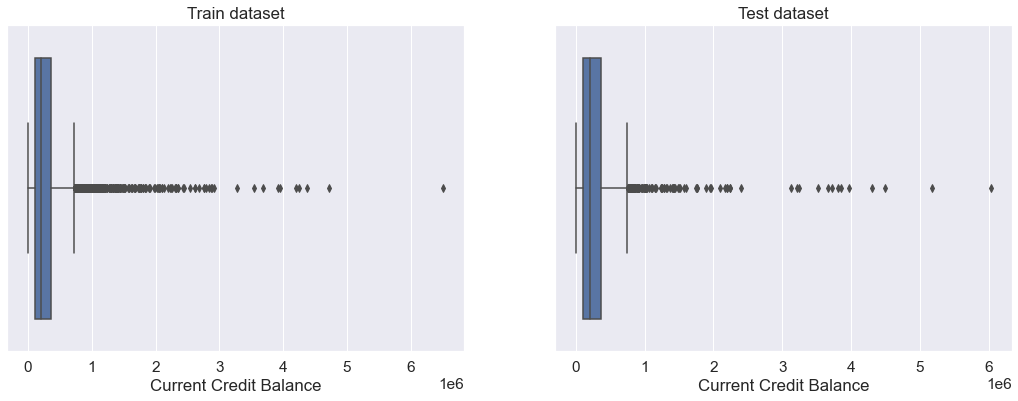

In [1760]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Current Credit Balance'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Current Credit Balance'], whis=1.5)

In [1761]:
train_data.loc[(train_data['Current Credit Balance'] < train_data['Current Credit Balance'].quantile(0.025))|(train_data['Current Credit Balance'] > np.quantile(train_data['Current Credit Balance'],q=0.85)), 'Current Credit Balance'] = train_data['Current Credit Balance'].median()

In [1762]:
test_data.loc[(test_data['Current Credit Balance'] < test_data['Current Credit Balance'].quantile(0.025))|(test_data['Current Credit Balance'] > np.quantile(test_data['Current Credit Balance'],q=0.85)), 'Current Credit Balance'] = test_data['Current Credit Balance'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Current Credit Balance'>

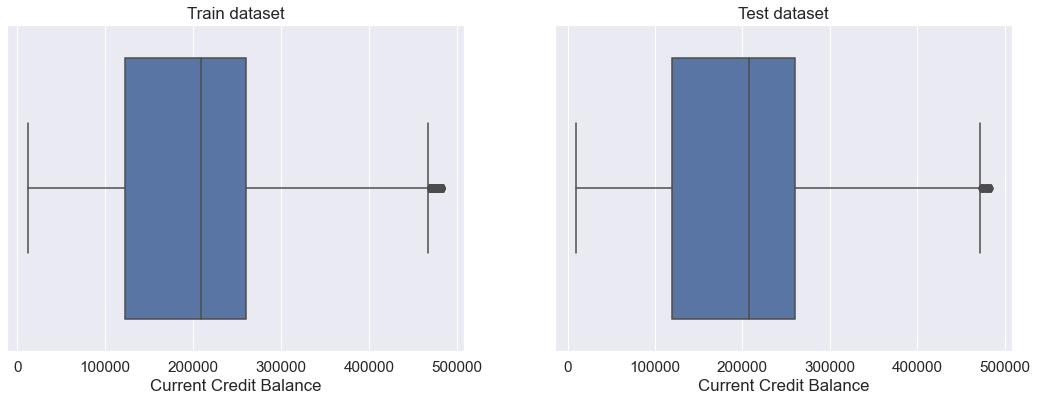

In [1763]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Current Credit Balance'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Current Credit Balance'], whis=1.5)

***15) Monthly Debt***

In [1764]:
train_data['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [1765]:
test_data['Monthly Debt'].describe()

count     2500.000000
mean     18271.340000
std      11543.881469
min         93.000000
25%      10024.750000
50%      16642.500000
75%      24146.000000
max      93555.000000
Name: Monthly Debt, dtype: float64

<AxesSubplot:title={'center':'Distribution of Monthly Debt'}, xlabel='Monthly Debt', ylabel='Amount of clients'>

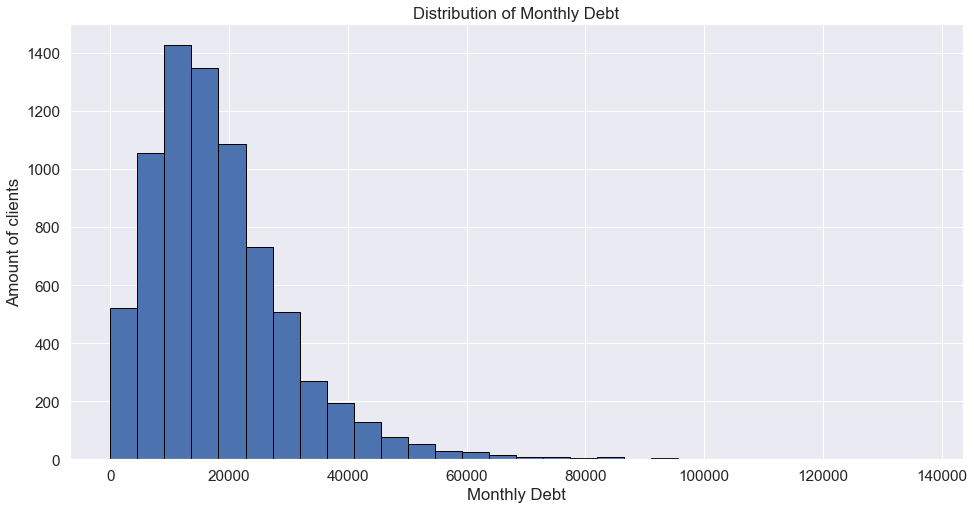

In [1766]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Monthly Debt')
plt.title('Distribution of Monthly Debt')
train_data['Monthly Debt'].hist(bins=30,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Monthly Debt'>

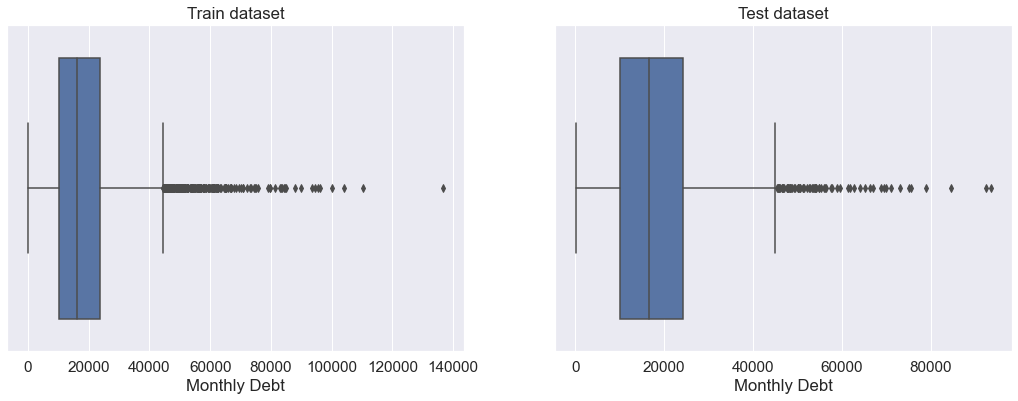

In [1767]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Monthly Debt'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Monthly Debt'], whis=1.5)

In [1768]:
train_data.loc[(train_data['Monthly Debt'] < train_data['Monthly Debt'].quantile(0.025))|(train_data['Monthly Debt'] > np.quantile(train_data['Monthly Debt'],q=0.9)), 'Monthly Debt'] = train_data['Monthly Debt'].median()

In [1769]:
test_data.loc[(test_data['Monthly Debt'] < test_data['Monthly Debt'].quantile(0.025))|(test_data['Monthly Debt'] > np.quantile(test_data['Monthly Debt'],q=0.9)), 'Monthly Debt'] = test_data['Monthly Debt'].median()

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Monthly Debt'>

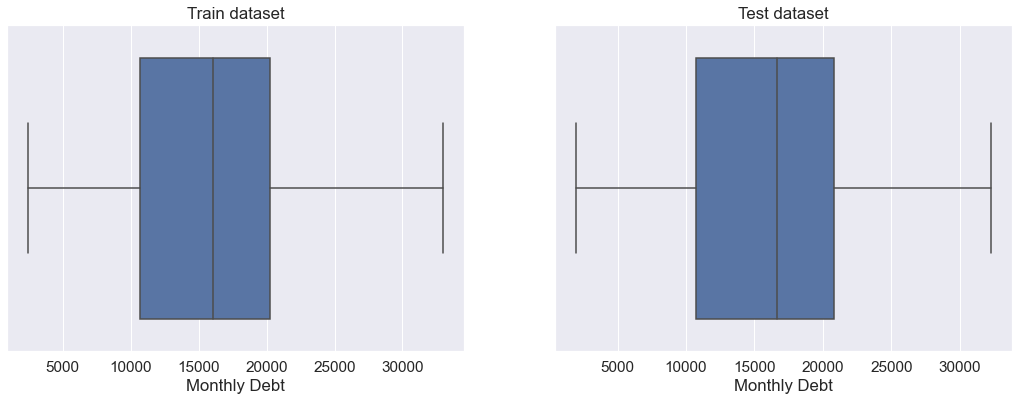

In [1770]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Monthly Debt'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Monthly Debt'], whis=1.5)

***16) Credit Score***

In [1771]:
train_data['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [1772]:
test_data['Credit Score'].describe()

count    1987.000000
mean     1234.516860
std      1740.219442
min       585.000000
25%       710.000000
50%       731.000000
75%       743.000000
max      7480.000000
Name: Credit Score, dtype: float64

In [1773]:
train_data.loc[train_data['Credit Score'].isnull() == True,'Credit Score'] = train_data['Credit Score'].median()

In [1774]:
test_data.loc[test_data['Credit Score'].isnull() == True,'Credit Score'] = test_data['Credit Score'].median()

<AxesSubplot:title={'center':'Distribution of Credit Score'}, xlabel='Credit Score', ylabel='Amount of clients'>

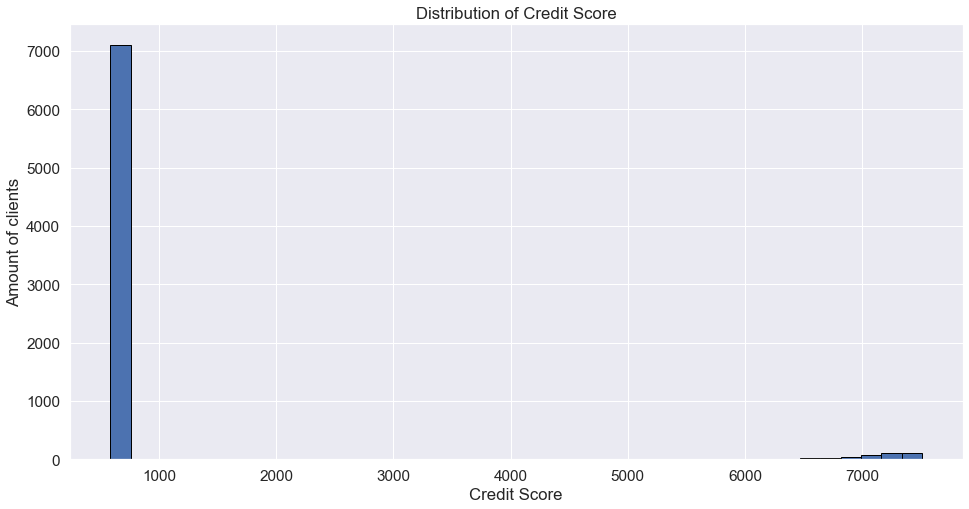

In [1775]:
plt.figure(figsize=(16,8))
plt.ylabel('Amount of clients')
plt.xlabel('Credit Score')
plt.title('Distribution of Credit Score')
train_data['Credit Score'].hist(bins=40,edgecolor='black')

<AxesSubplot:title={'center':'Test dataset'}, xlabel='Credit Score'>

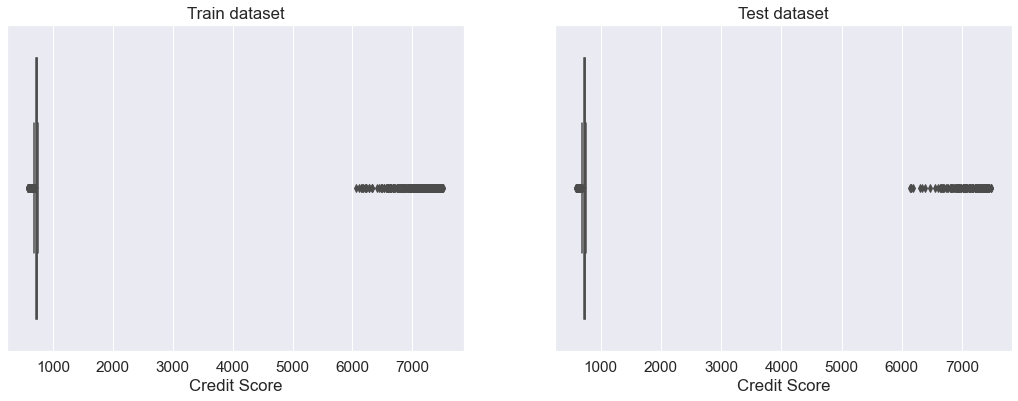

In [1776]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Train dataset')
sns.boxplot(train_data['Credit Score'], whis=1.5)

plt.subplot(122)
plt.title('Test dataset')
sns.boxplot(test_data['Credit Score'], whis=1.5)

In [1777]:
np.quantile(train_data['Credit Score'],q=0.05)

671.0

In [1778]:
#train_data.loc[(train_data['Credit Score'] < train_data['Credit Score'].quantile(0.05))|(train_data['Credit Score'] > np.quantile(train_data['Credit Score'],q=0.95)), 'Credit Score'] = train_data['Credit Score'].median()

In [1779]:
#test_data.loc[(test_data['Credit Score'] < test_data['Credit Score'].quantile(0.05))|(test_data['Credit Score'] > np.quantile(test_data['Credit Score'],q=0.95)), 'Credit Score'] = test_data['Credit Score'].median()

    Credit Score имеет сильнейшую корреляцию с целевым признаком и обработка выбросов приводит к ухудшению качества обучения модели --> оставляем необработанным

## Итоговый вид датасетов после IDE и предобработки данных

In [1780]:
train_data = reduce_mem_usage(train_data)
# уменьшим объем памяти, занимаемый нашими датасетами с помощью специальной функции для облегчения дальнейшего обучения модели.

Memory usage of dataframe is 0.75 MB
Memory usage after optimization is: 0.45 MB
Decreased by 40.0%


In [1781]:
test_data = reduce_mem_usage(test_data)

Memory usage of dataframe is 0.23 MB
Memory usage after optimization is: 0.15 MB
Decreased by 36.1%


In [1782]:
train_data.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Long Term,Short Term
0,482087.0,0.0,11.0,26.296875,685960.0,0.0,100000000.0,47386.0,7912.0,749.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1025487.0,0.0,15.0,15.296875,478159.0,0.0,264968.0,394972.0,18368.0,737.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,751412.0,0.0,11.0,17.000000,478159.0,0.0,100000000.0,308389.0,13648.0,742.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,805068.0,0.0,8.0,22.500000,147400.0,0.0,121396.0,95855.0,11336.0,694.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,776264.0,0.0,13.0,13.601562,385836.0,0.0,125840.0,93309.0,7180.0,719.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1783]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 7500 non-null   float32
 1   Tax Liens                     7500 non-null   float16
 2   Number of Open Accounts       7500 non-null   float16
 3   Years of Credit History       7500 non-null   float16
 4   Maximum Open Credit           7500 non-null   float32
 5   Months since last delinquent  7500 non-null   float16
 6   Current Loan Amount           7500 non-null   float32
 7   Current Credit Balance        7500 non-null   float32
 8   Monthly Debt                  7500 non-null   float16
 9   Credit Score                  7500 non-null   float16
 10  Credit Default                7500 non-null   int8   
 11  Have Mortgage                 7500 non-null   float16
 12  Home Mortgage                 7500 non-null   float16
 13  Own

In [1784]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Long Term,Short Term
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.0,7500.000000,7500.0,7500.0,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.325285e+06,0.030136,inf,inf,409298.18750,3.236328,11873135.0,203093.375000,inf,inf,...,0.082642,0.062561,0.068787,0.056793,0.052795,0.045197,0.034546,0.075073,0.259277,0.740723
std,7.567584e+05,0.271484,3.164062,4.460938,145619.96875,7.261719,31926302.0,106510.953125,inf,inf,...,0.275391,0.242188,0.253174,0.231567,0.223755,0.207764,0.182495,0.263428,0.438232,0.438232
min,1.645970e+05,0.000000,4.000000,8.000000,71236.00000,0.000000,11242.0,11970.000000,2436.0,585.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,14.000000,298963.50000,0.000000,180169.0,122564.250000,10710.0,718.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,478159.00000,0.000000,309573.0,209323.000000,16080.0,731.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.499974e+06,0.000000,12.000000,19.703125,478159.00000,0.000000,519882.0,260699.000000,20224.0,740.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.014934e+07,7.000000,17.000000,28.000000,712250.00000,29.000000,100000000.0,484481.000000,32992.0,7512.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1785]:
test_data.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Long Term,Short Term
0,1178475.0,0.0,9.0,12.500000,220968.0,0.0,162470.0,105906.0,6812.0,731.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1178475.0,0.0,6.0,17.000000,478676.0,8.0,78298.0,46037.0,2318.0,699.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1152540.0,0.0,10.0,13.703125,204600.0,0.0,200178.0,146490.0,18736.0,7260.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1220313.0,0.0,16.0,17.000000,456302.0,0.0,217382.0,213199.0,27552.0,739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1178475.0,0.0,11.0,23.593750,478676.0,0.0,777634.0,425391.0,16640.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1786]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 2500 non-null   float32
 1   Tax Liens                     2500 non-null   float16
 2   Number of Open Accounts       2500 non-null   float16
 3   Years of Credit History       2500 non-null   float16
 4   Maximum Open Credit           2500 non-null   float32
 5   Months since last delinquent  2500 non-null   float16
 6   Current Loan Amount           2500 non-null   float32
 7   Current Credit Balance        2500 non-null   float32
 8   Monthly Debt                  2500 non-null   float16
 9   Credit Score                  2500 non-null   float16
 10  Have Mortgage                 2500 non-null   float16
 11  Home Mortgage                 2500 non-null   float16
 12  Own Home                      2500 non-null   float16
 13  Ren

In [1787]:
test_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Long Term,Short Term
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.000000,2500.0,2500.0,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.144077e+06,0.035187,11.187500,16.921875,409791.125000,3.087891,12155693.0,202577.546875,inf,inf,...,0.091187,0.060791,0.067627,0.054810,0.056000,0.042786,0.039612,0.082825,0.255615,0.744629
std,2.561656e+05,0.386230,4.851562,4.593750,145403.859375,6.882812,32261024.0,108886.234375,inf,inf,...,0.287842,0.239136,0.250977,0.227661,0.229858,0.202393,0.195068,0.275635,0.436279,0.436279
min,5.571940e+05,0.000000,1.000000,7.699219,73150.000000,0.000000,15422.0,9500.000000,1950.0,585.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.010620e+06,0.000000,8.000000,13.898438,295988.000000,0.000000,187126.5,119776.000000,10718.0,717.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,478676.000000,0.000000,322366.0,207385.000000,16640.0,731.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.178475e+06,0.000000,14.000000,19.824219,478676.000000,0.000000,522582.5,260380.750000,20788.0,741.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.820162e+06,15.000000,48.000000,28.093750,711150.000000,27.000000,100000000.0,484196.000000,32272.0,7480.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Корреляция признаков после обработки данных

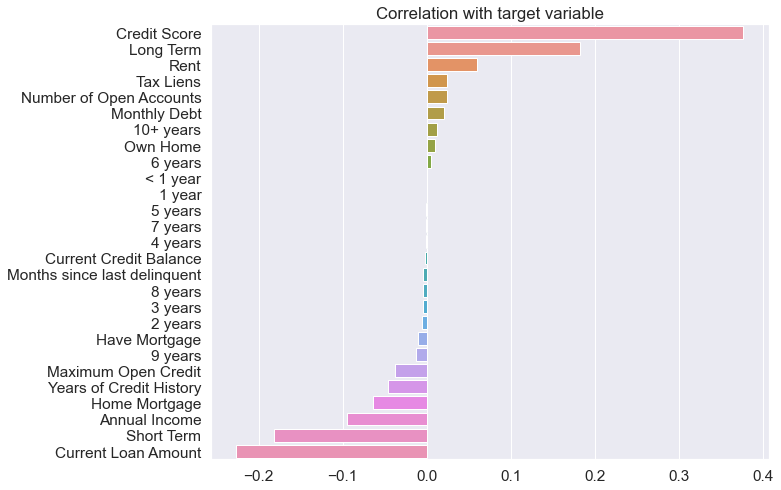

In [1788]:
corr_with_target(train_data)

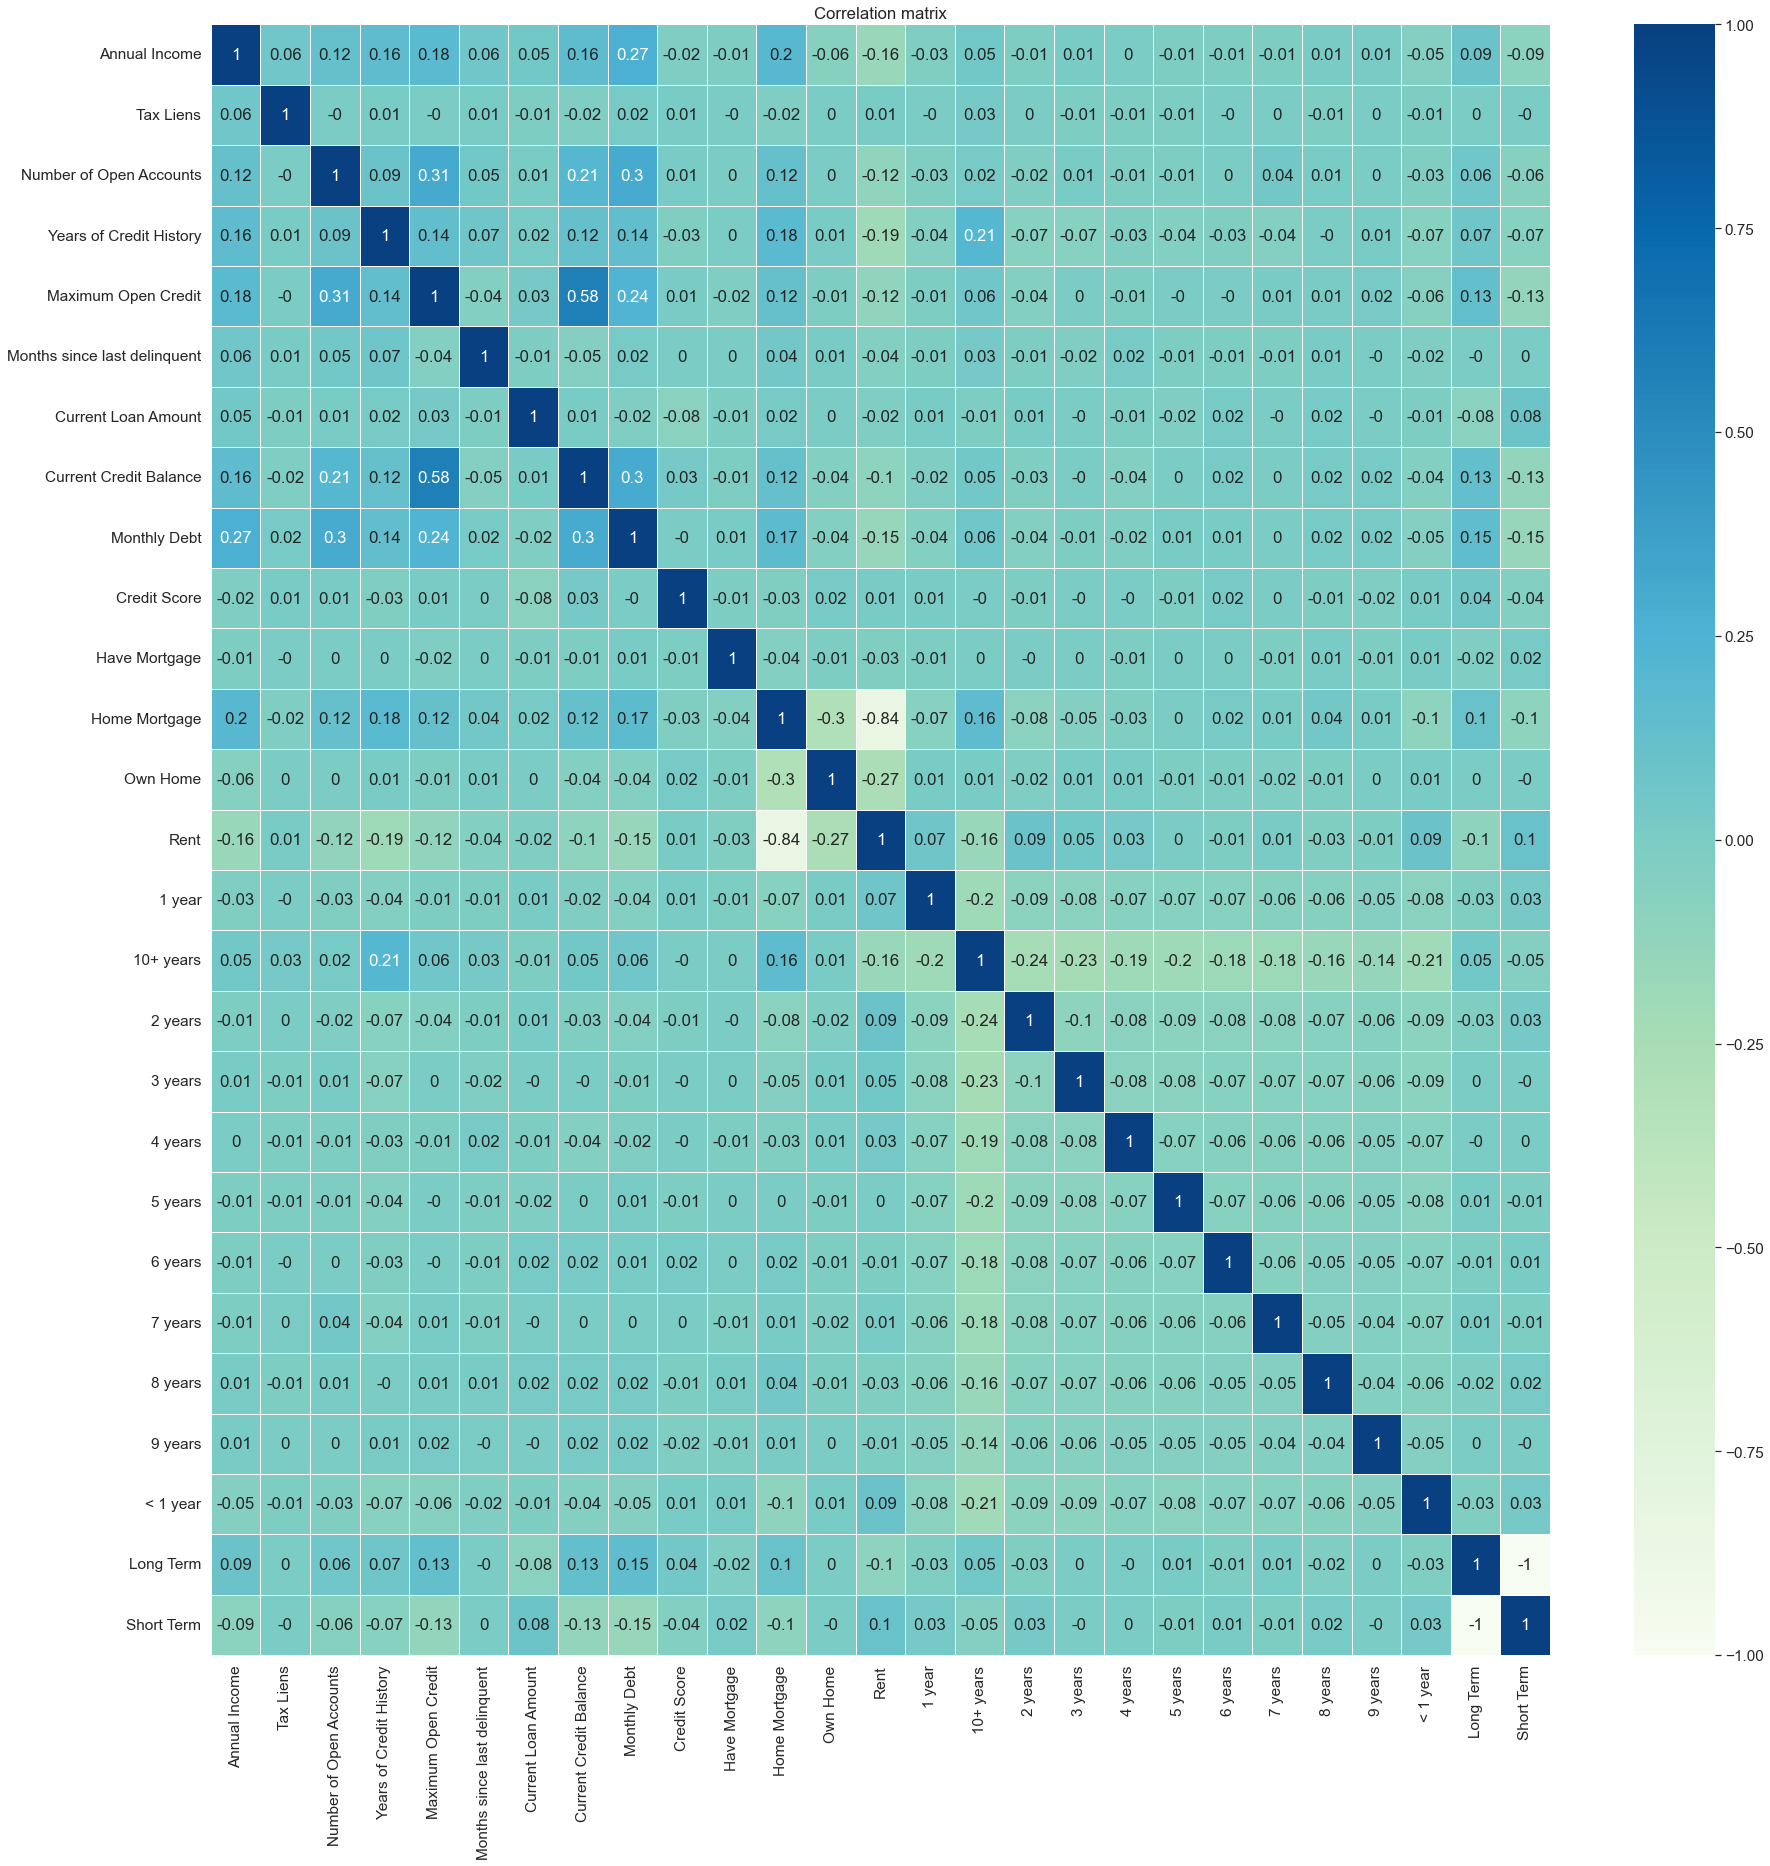

In [1789]:
corr_matrix(train_data)

In [1790]:
PREP_DATASET_PATH = './training_project_data_prep.csv'
with open(PREP_DATASET_PATH, 'wb') as file:
    pickle.dump(test_data, file)

## Обучение модели

In [1791]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score as roc
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
import catboost as cat

In [1792]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1)

In [1793]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

### Нормализация признаков

In [1794]:
scaler = StandardScaler()
TEST_COLUMNS = test_data.columns

train_data_norm = train_data.copy()
train_data_norm[train_data_norm.drop('Credit Default',axis=1).columns] = scaler.fit_transform(train_data_norm.drop('Credit Default',axis=1))

test_data_norm = test_data.copy()
test_data_norm = scaler.fit_transform(test_data_norm)

train_data = train_data_norm.copy()
test_data = test_data_norm.copy()
test_data = pd.DataFrame(test_data, columns=TEST_COLUMNS)

### Разделение выборки на train и test

In [1795]:
X = train_data.drop('Credit Default', axis=1)
y = train_data['Credit Default']

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)

### Балансировка целевой переменной

In [1796]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default')
df_balanced['Credit Default'].value_counts()

0    3795
1    2910
Name: Credit Default, dtype: int64

In [1797]:
X_train = df_balanced.drop(columns='Credit Default')
y_train = df_balanced['Credit Default']

**Построение моделей**

## XGBoost

In [1808]:
xgb_model = xgb.XGBClassifier(num_parallel_tree=5,max_depth=2,random_state=42,n_jobs=-1,base_score=0.1,n_estimators=115,learning_rate=0.29503)

In [1809]:
X_train_xgb = X_train.copy()
X_valid_xgb = X_valid.copy()

In [1810]:
X_train_xgb.columns = range(len(X_train.columns))
X_valid_xgb.columns = range(len(X_valid.columns))

In [1811]:
xgb_model.fit(X_train_xgb, y_train)

XGBClassifier(base_score=0.1, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.29503, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=115, n_jobs=-1,
              num_parallel_tree=5, predictor='auto', random_state=42, ...)

In [1812]:
y_pred_train = xgb_model.predict(X_train_xgb)
y_pred_valid = xgb_model.predict(X_valid_xgb)

In [1813]:
get_classification_report(y_train, y_pred_train, y_valid, y_pred_valid)

TRAIN

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3795
           1       0.77      0.61      0.68      2910

    accuracy                           0.75      6705
   macro avg       0.75      0.74      0.74      6705
weighted avg       0.75      0.75      0.75      6705

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1592
           1       0.56      0.51      0.53       658

    accuracy                           0.74      2250
   macro avg       0.68      0.67      0.68      2250
weighted avg       0.73      0.74      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1322  270
1                320  338


### Обучение лучшей модели на всем train

In [1823]:
X.columns = range(len(X.columns))

In [1824]:
test_data.columns = range(len(test_data.columns))

In [1825]:
xgb_model.fit(X,y)

XGBClassifier(base_score=0.1, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.29503, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=115, n_jobs=-1,
              num_parallel_tree=5, predictor='auto', random_state=42, ...)

### Предсказание на тесте

In [1826]:
final_predict = pd.DataFrame(xgb_model.predict(test_data),columns=['Credit Default'])

## Сохранение модели

In [1827]:
SCALER_FILE_PATH = './scaler.pkl'
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [1828]:
final_predict.value_counts()

Credit Default
0                 2254
1                  246
dtype: int64

In [1829]:
final_predict.to_csv('Aliev_prediction_part_2.csv')